In [23]:
from keras.preprocessing import image as keras_image
import torchvision.transforms as transforms
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def preprocess_image(img_path, model_type='keras', color_mode='rgb'):
    if model_type == 'keras':
        if color_mode == 'grayscale':
            img = keras_image.load_img(img_path, target_size=(48,48), color_mode='grayscale')
        else:
            img = keras_image.load_img(img_path, target_size=(224,224), color_mode='rgb')

        img_array = keras_image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.0
    elif model_type == 'pytorch':
        img = Image.open(img_path).convert('RGB')
        transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Resize((224, 224), antialias=True),
            transforms.Normalize(mean = (0.5, 0.5, 0.5), std = (0.5, 0.5, 0.5))
        ])
        img_tensor = transform(img)
        img_array = transform(img).unsqueeze(0)  # Add batch dimension
    return img_array


In [3]:
from keras.models import load_model

googlenet = load_model('/kaggle/input/group-14-deeplearning-prj/google_net_1.h5')
resnet = load_model('/kaggle/input/group-14-deeplearning-prj/ResNet50V2_Model.h5')

emotion_dict = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Neutral', 5: 'Sad', 6: 'Surprise'}

def convert_keras_predictions_to_label(predictions):
    predicted_class_index = np.argmax(predictions[0])
    emotion_label = emotion_dict.get(predicted_class_index, 'Unknown')
    return emotion_label

def convert_pytorch_predictions_to_label(predictions):
    
    predicted_class_index = torch.argmax(predictions[0]).item()
    emotion_label = emotion_dict.get(predicted_class_index, 'Unknown')

    return emotion_label

def classify_emotion(model, preprocessed_image, model_type='keras'):
    if model_type == 'keras':
        predictions = model.predict(preprocessed_image)
    elif model_type == 'pytorch':
        model.eval()  # Set the model to evaluation mode
        with torch.no_grad():
            predictions = model(preprocessed_image)

    # Convert predictions to emotion labels
    if model_type == 'keras':
        emotion_label = convert_keras_predictions_to_label(predictions)
    elif model_type == 'pytorch':
        emotion_label = convert_pytorch_predictions_to_label(predictions)
    else:
        raise ValueError("Unsupported model_type. Use 'keras' or 'pytorch'.")

    return emotion_label


In [4]:
vit = torch.load('/kaggle/input/group-14-deeplearning-prj/model.pth')

In [5]:
random_image_path="/kaggle/input/fer2013/test/disgust/PrivateTest_3881740.jpg"

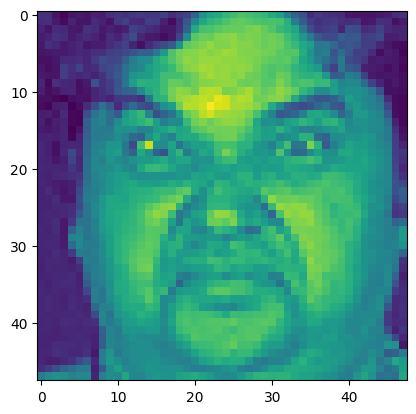

In [13]:
img = Image.open(random_image_path)
plt.imshow(img)
plt.show()

In [10]:
#googlenet
ggnet_image=preprocess_image(random_image_path, model_type='keras', color_mode='grayscale')
classify_emotion(googlenet,ggnet_image,model_type='keras')

1/1 [==============================] - 7s 7s/step


'Disgust'

In [17]:
#resnet50v2
resnet_image=preprocess_image(random_image_path,model_type='keras',color_mode='rgb')
classify_emotion(resnet,resnet_image,model_type='keras')

1/1 [==============================] - 2s 2s/step


'Angry'

In [26]:
#vit
vit_image=preprocess_image(random_image_path,model_type='pytorch')
vit_image = vit_image.to('cuda')

classify_emotion(vit, vit_image, model_type='pytorch')


'Angry'